# Block 5 Exercise 2: Predicting the fare of taxi rides
Using the NY Taxi data set (see Use Case Block I) and the use case from the lecture...

In [2]:
import pandas as pd
import numpy as np
import folium


In [3]:
#check if notebook runs in colab
import sys
IN_COLAB = 'google.colab' in sys.modules
print('running in Colab:',IN_COLAB)
path='..'
if IN_COLAB:
  #in colab, we need to clone the data from the repo
  !git clone https://github.com/keuperj/DataScienceSS20.git
  path='DataScienceSS20'

running in Colab: False


In [4]:
# we load the data we have saved after wrangling and pre-processing in block I
X=pd.read_csv(path+'/DATA/train_cleaned.csv')
drop_columns=['Unnamed: 0','Unnamed: 0.1','Unnamed: 0.1.1','key','pickup_datetime','pickup_date','pickup_latitude_round3','pickup_longitude_round3','dropoff_latitude_round3','dropoff_longitude_round3']
X=X.drop(drop_columns,axis=1)
X=pd.get_dummies(X)# one hot coding
#generate labels
y=X['fare_amount']
X=X.drop(['fare_amount'],axis=1)

In [5]:
# a quick look at the data
X.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0


In [6]:
y.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

### E 2.1 Split data into train and test data
* use data from 2009-1014 for training and 2015 for evaluation

In [7]:
#only works for one Value
tr = X.loc[(X['pickup_year'] == 2010)]

In [8]:
tr.head()

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0
16,-73.969505,40.784843,-73.958732,40.783357,1,7,14,3,7,2010,...,1,0,0,0,0,0,1,0,0,0
18,-73.985382,40.747858,-73.978377,40.762070,1,7,13,2,9,2010,...,1,0,0,0,0,0,1,0,0,0
21,-74.000632,40.747473,-73.986672,40.740577,1,6,12,1,12,2010,...,1,0,0,0,0,0,1,0,0,0


In [9]:
#works for multiple values --> way to go
train = X.pickup_year.isin(['2009','2010','2011','2012','2013','2014'])

In [10]:
X_train = X[train]

In [11]:
X_train

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
0,-73.844311,40.721319,-73.841610,40.712278,1,15,17,1,6,2009,...,0,0,1,0,0,0,0,0,1,0
1,-74.016048,40.711303,-73.979268,40.782004,1,5,16,2,1,2010,...,1,0,0,0,0,0,1,0,0,0
2,-73.982738,40.761270,-73.991242,40.750562,2,18,0,4,8,2011,...,1,0,0,0,0,0,1,0,0,0
3,-73.987130,40.733143,-73.991567,40.758092,1,21,4,6,4,2012,...,1,0,0,0,0,0,1,0,0,0
4,-73.968095,40.768008,-73.956655,40.783762,1,9,7,2,3,2010,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399994,-73.951399,40.770201,-73.973983,40.763075,1,2,11,4,7,2009,...,1,0,0,0,0,0,1,0,0,0
399995,-73.986585,40.746032,-73.990865,40.724077,1,1,12,0,9,2013,...,1,0,0,0,0,0,1,0,0,0
399997,-73.985598,40.731558,-73.987657,40.728738,1,7,19,0,10,2012,...,1,0,0,0,0,0,1,0,0,0
399998,-74.007692,40.740735,-73.988455,40.722847,1,14,2,6,6,2014,...,1,0,0,0,0,0,1,0,0,0


In [12]:
y_train=y[train]
y_train.head()

0     4.5
1    16.9
2     5.7
3     7.7
4     5.3
Name: fare_amount, dtype: float64

In [13]:
test = X.pickup_year.isin(['2015'])

In [14]:
X_test = X[test]

In [15]:
X_test

,pickup_longitude,pickup_latitude,dropoff_longitude,dropoff_latitude,passenger_count,pickup_day,pickup_hour,pickup_day_of_week,pickup_month,pickup_year,...,pickup_borough_manhattan,pickup_borough_others,pickup_borough_queens,pickup_borough_staten_island,dropoff_borough_bronx,dropoff_borough_brooklyn,dropoff_borough_manhattan,dropoff_borough_others,dropoff_borough_queens,dropoff_borough_staten_island
28,-74.010483,40.717667,-73.985771,40.660366,1,21,21,0,6,2015,...,1,0,0,0,0,1,0,0,0,0
32,-73.983330,40.738720,-73.933197,40.847225,1,11,3,0,1,2015,...,1,0,0,0,0,0,1,0,0,0
33,-73.990173,40.756447,-73.985619,40.762829,1,12,8,4,3,2015,...,1,0,0,0,0,0,1,0,0,0
65,-73.979279,40.723438,-74.004608,40.746948,6,12,10,0,4,2015,...,1,0,0,0,0,0,1,0,0,0
66,-73.954796,40.779335,-73.944931,40.780087,1,12,23,2,5,2015,...,1,0,0,0,0,0,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
399894,-73.958290,40.800842,-73.964157,40.795120,3,25,20,3,2,2015,...,1,0,0,0,0,0,1,0,0,0
399903,-73.976318,40.751667,-73.995316,40.759514,4,18,7,3,3,2015,...,1,0,0,0,0,0,1,0,0,0
399907,-73.983368,40.726261,-73.991623,40.731087,1,24,9,2,3,2015,...,1,0,0,0,0,0,1,0,0,0
399985,-73.993896,40.732632,-73.991829,40.744473,1,1,21,5,5,2015,...,1,0,0,0,0,0,1,0,0,0


In [16]:
y_test = y[test]
y_test.head()

28    22.54
32    58.00
33     4.50
65    11.50
66     5.00
Name: fare_amount, dtype: float64

In [17]:
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train=np.array(X_train)
X_test=np.array(X_test)

### E 2.2 Train a Random Forest Regression Model
* train model using [RF regression](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor)
* optimize the model parameters (#trees, depth, vars per split, ...) and evaluate the [MSE](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.mean_squared_error.html#sklearn.metrics.mean_squared_error) on train and test data
* Analyze the model error: are there typical settings where the model fails?

In [18]:
#RF regression
from sklearn.ensemble import RandomForestRegressor
rfc=RandomForestRegressor(n_jobs=4, n_estimators=10)
rfc.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='auto', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=10, n_jobs=4, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

In [19]:
#MSE
from sklearn.metrics import mean_squared_error
y_pred = rfc.predict(X_test)
mean_squared_error(y_test, y_pred)

23.12727312968806

In [20]:
#Analyze the error
dif = np.abs(y_test - y_pred)
dif

array([ 1.507, 25.5  ,  0.85 , ...,  0.2  ,  0.05 ,  1.55 ])

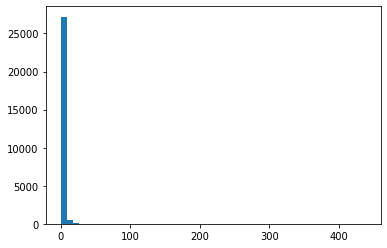

In [21]:
import matplotlib.pyplot as plt
t = plt.hist(dif, bins=50)

In [28]:
dif_20=dif[dif<20]

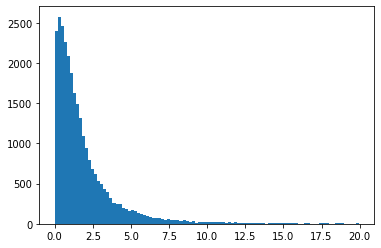

In [29]:
t=plt.hist(dif_20, bins=100)